It is an interesting project combining data analyses and product/marketing knowledge. The ultimate goal is to predict multiple destinations but there are a lot more we could learn from the data before we get to that stage. So let us start exploring the data first and then we will see how we could make predictions.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_users = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/test_users.csv')
train_users = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv')
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
train_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [4]:
train_users.shape

(213451, 16)

In [5]:
test_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [6]:
test_users.shape

(62096, 15)

### 1. Data Preprocessing

In [7]:
train_users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
test_users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking         float64
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
dtype: object

In [9]:
train_users.isnull().sum() / len(train_users) * 100

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

In [10]:
test_users.isnull().sum() / len(test_users) * 100

id                           0.000000
date_account_created         0.000000
timestamp_first_active       0.000000
date_first_booking         100.000000
gender                       0.000000
age                         46.502190
signup_method                0.000000
signup_flow                  0.000000
language                     0.000000
affiliate_channel            0.000000
affiliate_provider           0.000000
first_affiliate_tracked      0.032208
signup_app                   0.000000
first_device_type            0.000000
first_browser                0.000000
dtype: float64

In [11]:
all_users = pd.concat([train_users, test_users])
all_users.shape

(275547, 16)

In [12]:
all_users.timestamp_first_active = pd.to_datetime(all_users.timestamp_first_active.astype(str), format='%Y%m%d%H%M%S')
all_users.date_account_created = pd.to_datetime(all_users.date_account_created, format='%Y-%m-%d')
all_users.date_first_booking = pd.to_datetime(all_users.date_first_booking, format='%Y-%m-%d')

all_users['year_account_created'] = all_users['date_account_created'].dt.year
all_users['month_account_created'] = all_users['date_account_created'].dt.month
all_users['day_account_created'] = all_users['date_account_created'].dt.day
all_users['weekday_account_created_plot'] = all_users['date_account_created'].dt.day_name()
all_users['weekday_account_created'] = all_users['date_account_created'].dt.dayofweek

all_users['date_first_active'] = all_users['timestamp_first_active'].dt.date
all_users['year_first_active'] = all_users['timestamp_first_active'].dt.year
all_users['month_first_active'] = all_users['timestamp_first_active'].dt.month
all_users['day_first_active'] = all_users['timestamp_first_active'].dt.day

all_users['year_first_booking'] = all_users['date_first_booking'].dt.year
all_users['month_first_booking'] = all_users['date_first_booking'].dt.month
all_users['day_first_booking'] = all_users['date_first_booking'].dt.day
all_users['weekday_first_booking_plot'] = all_users['date_first_booking'].dt.day_name()
all_users['weekday_first_booking'] = all_users['date_first_booking'].dt.dayofweek

#all_users['age'] = all_users['age'].astype('Int64')
all_users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,weekday_account_created,date_first_active,year_first_active,month_first_active,day_first_active,year_first_booking,month_first_booking,day_first_booking,weekday_first_booking_plot,weekday_first_booking
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,-unknown-,...,0,2009-03-19,2009,3,19,NaN,NaN,NaN,NaN,NaN
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,...,2,2009-05-23,2009,5,23,NaN,NaN,NaN,NaN,NaN
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,...,1,2009-06-09,2009,6,9,2010.0,8.0,2.0,Monday,0.0
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,...,0,2009-10-31,2009,10,31,2012.0,9.0,8.0,Saturday,5.0
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,...,1,2009-12-08,2009,12,8,2010.0,2.0,18.0,Thursday,3.0


### 2. Exploratory Analysis

#### 2.1 Univariate Analysis

##### 2.1.1 Continuous Variable

In [13]:
all_users.describe()

,age,signup_flow,year_account_created,month_account_created,day_account_created,weekday_account_created,year_first_active,month_first_active,day_first_active,year_first_booking,month_first_booking,day_first_booking,weekday_first_booking
count,158681.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,88908.000000,88908.000000,88908.000000,88908.000000
mean,47.145310,4.291965,2013.243828,6.457505,15.958969,2.775479,2013.243341,6.457446,15.958845,2013.042842,6.110597,15.644509,2.803212
std,142.629468,8.794313,0.921206,2.985339,8.757489,1.947495,0.921756,2.985189,8.757084,1.016404,3.180892,8.725647,1.915784
min,1.000000,0.000000,2010.000000,1.000000,1.000000,0.000000,2009.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,0.000000
25%,28.000000,0.000000,2013.000000,4.000000,8.000000,1.000000,2013.000000,4.000000,8.000000,2012.000000,4.000000,8.000000,1.000000
50%,33.000000,0.000000,2014.000000,7.000000,16.000000,3.000000,2014.000000,7.000000,16.000000,2013.000000,6.000000,16.000000,3.000000
75%,42.000000,1.000000,2014.000000,9.000000,23.000000,4.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000,4.000000
max,2014.000000,25.000000,2014.000000,12.000000,31.000000,6.000000,2014.000000,12.000000,31.000000,2015.000000,12.000000,31.000000,6.000000


Skewness=13.545
Statistics=0.086, p=0.000


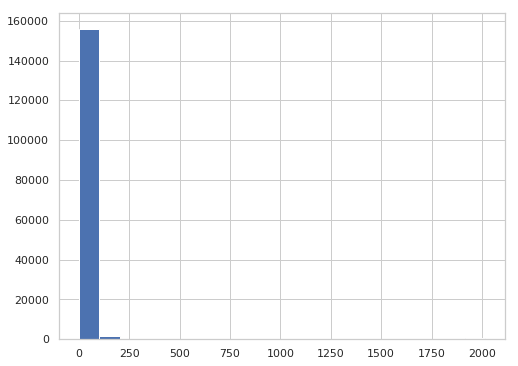

In [14]:
from scipy.stats import shapiro
stat, p = shapiro(all_users['age'].dropna())
print('Skewness=%.3f' %all_users['age'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.set(style='whitegrid', rc={'figure.figsize':(8,6), 'axes.labelsize':12})
plt.hist(all_users['age'].dropna(), bins=20);

It is hard to see the distribution of ages over 100, so let us break age into different intervals and see.

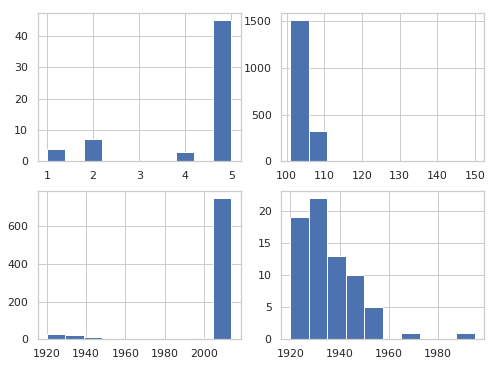

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.hist(all_users['age'][all_users['age'] < 10])
ax2.hist(all_users['age'][(all_users['age'] > 100) & (all_users['age'] < 200)])
ax3.hist(all_users['age'][all_users['age'] > 200])
ax4.hist(all_users['age'][(all_users['age'] > 200) & (all_users['age'] < 2000)]);

Some values of age are equal or less than 5 and some are larger than 2000, which I think might be input casually by users. For those over 100, I am not sure why but it might be too old to be real values. For those whose age between 1920 and 1980, I think that it is possible to wrongly put birth year as age. But since we do not have the year variable indicating when the data was created, it is hard to get the age. I would treat these extreme values as -1 later.

Skewness=1.268
Statistics=0.907, p=0.000


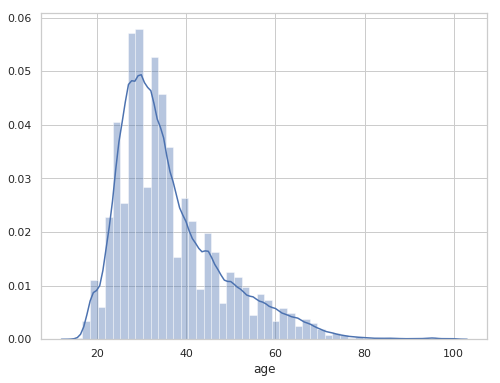

In [16]:
all_users.age.loc[(all_users['age'] < 10) | (all_users['age'] > 100)] = np.nan
stat, p = shapiro(all_users['age'].dropna())
print('Skewness=%.3f' %all_users['age'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(all_users['age'].dropna());

Majority of users were between 20 and 40 years old.

Skewness=2.234
Statistics=0.467, p=0.000


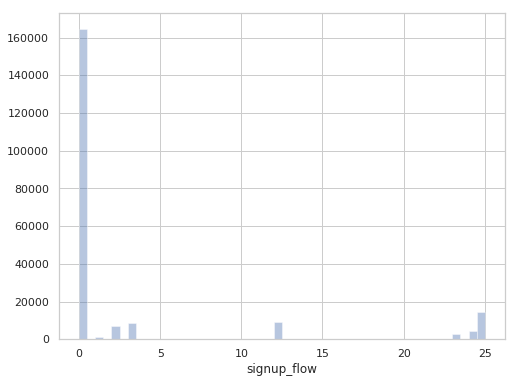

In [17]:
stat, p = shapiro(train_users['signup_flow'])
print('Skewness=%.3f' %train_users['signup_flow'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(train_users['signup_flow'], kde=False);

Majority of users signed up from 0 pages, which I think were directly signing up without going to other pages.

##### 2.1.2 Categorical Variable

In [18]:
pd.set_option('display.max_rows', 300)
users_cat = all_users.select_dtypes(include=['object']).columns.drop(['id'])

cat_summary = pd.DataFrame()
# loop through categorical variables, and append calculated stats together
for i in range(len(users_cat)):
    c = users_cat[i]
    df = pd.DataFrame({'Variable':[c]*len(all_users[c].unique()),
                       'Level':all_users[c].unique(),
                       'Count':all_users[c].value_counts(dropna=False)})
    df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
    cat_summary = cat_summary.append(df, ignore_index=True)
    
cat_summary

,Variable,Level,Count,Percentage
0,affiliate_channel,direct,181571,65.894748
1,affiliate_channel,seo,36439,13.224241
2,affiliate_channel,other,20075,7.285508
3,affiliate_channel,sem-non-brand,14362,5.212178
4,affiliate_channel,content,9547,3.464745
...,...,...,...,...
1890,weekday_first_booking_plot,Thursday,13939,5.058665
1891,weekday_first_booking_plot,Tuesday,13299,4.826400
1892,weekday_first_booking_plot,Wednesday,12734,4.621353
1893,weekday_first_booking_plot,Friday,10420,3.781569


From the above table we can see...

1) Demographics
*  **Age**: as we showed before, most are between 20 and 40
*  **Gender**: the ratio of male to female is roughly 1:1
*  **Language**: majority (> 96%) of users speak English, then come French and German
*  **Country destination**: nearly half of users did not book any places; among the rest, US was the top choice, then come France, Canada, and UK

2) Signup fields
* **Signup method**: most users (~ 72%) signed up through Facebook, certain users chose the basic method, only 1% signed up through Google
* **Signup app**: majority (> 92%) of users signed up through websites or mobile websites, especially the websites, only 7~8% signed up through downloaded app
* **Signup flow**: as we showed before, most are 0
* **First device type**: computers, either Mac or Windows, occupy a large percentage (> 70%), then comes iPhone
* **First browser**: IE, Firefox, Safari are most popular browser, then come mobile versions of those browers, which correponds to the data of signup app

3) Affiliate fields
* **Affiliate channel**: direct marketing were the most effective way to attract users (> 65% were through direct), then come SEO and SEM
* **Affiliate provider**: still direct marketing occupies a large percent (> 65%), then comes Google. This is very different from signup method. I think that it may be because Google is a good way to do marketing stuff since people use its search engine frequently. But Facebook is a social media application and many people have Facebook account registered and thus it is comvenient to use Facebook account to sign up on other websites.
* **First affiliate tracked**: most are untracked or missing (> 71%), certain users (> 22%) were coming through OMG (which I suppose to be Online Media Group? but not sure...)

##### 2.1.3 Date Variable

In [19]:
users_by_timeact

NameError: name 'users_by_timeact' is not defined

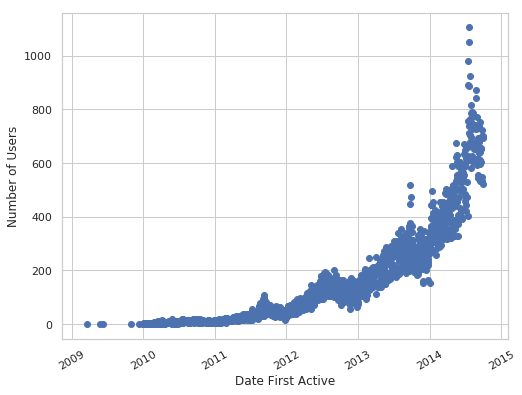

In [20]:
users_by_timeact = all_users.groupby(['date_first_active']).size().reset_index(name='n_users')

plt.scatter(users_by_timeact['date_first_active'], users_by_timeact['n_users'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=30)
plt.xlabel('Date First Active')
plt.ylabel('Number of Users');

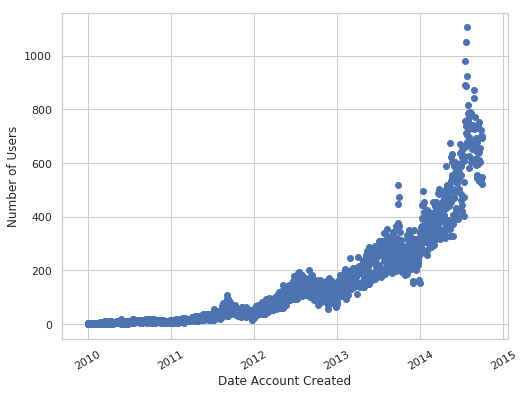

In [21]:
users_by_dateacc = all_users.groupby(['date_account_created']).size().reset_index(name='n_users')

plt.scatter(users_by_dateacc['date_account_created'], users_by_dateacc['n_users'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=30)
plt.xlabel('Date Account Created')
plt.ylabel('Number of Users');

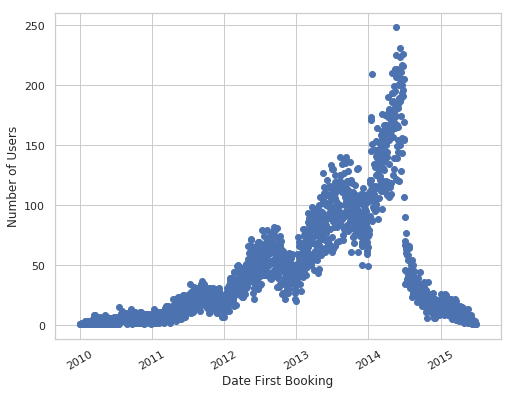

In [22]:
users_by_dateacc = all_users.groupby(['date_first_booking']).size().reset_index(name='n_users')

plt.scatter(users_by_dateacc['date_first_booking'], users_by_dateacc['n_users'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=30)
plt.xlabel('Date First Booking')
plt.ylabel('Number of Users');

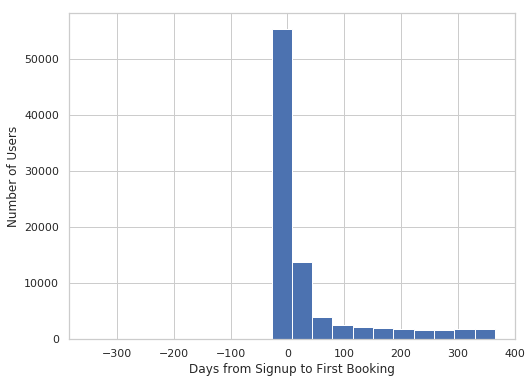

In [23]:
all_users['days_btwn_sp_bkng'] = (all_users['date_first_booking'] - all_users['date_account_created']).dt.days
plt.hist((all_users['days_btwn_sp_bkng']).dropna(), bins=20)
plt.xlabel('Days from Signup to First Booking')
plt.ylabel('Number of Users');

In [24]:
all_users['days_btwn_sp_bkng'].describe()

count    88908.000000
mean        44.362498
std         87.499561
min       -349.000000
25%          1.000000
50%          3.000000
75%         29.000000
max        365.000000
Name: days_btwn_sp_bkng, dtype: float64

Continuing above univariate analysis...

4) Date fields
* **Timestamp first active**: a rising trend overall
* **Date account created**: similar to the trend of timestamp first active, especially the three spikes between 2011 and 2012, 2012 and 2013, and 2013 and 2014
* **Date first booking**: though with many missing values, it is still interesting to see how it looks like. The number of users booking reached its peak during the mid of 2014 (as is depicted by timestamp first active and date account created plots as well) and right after that we can observe a huge drop.
* **Days from signup to first booking**: most users (> 75%) booked within 30 days after their signing up. There are some negative values which I think should be data quality issue. 

#### 2.2 Bivariate Analysis

##### 2.2.1 Demographics

##### Age and Gender

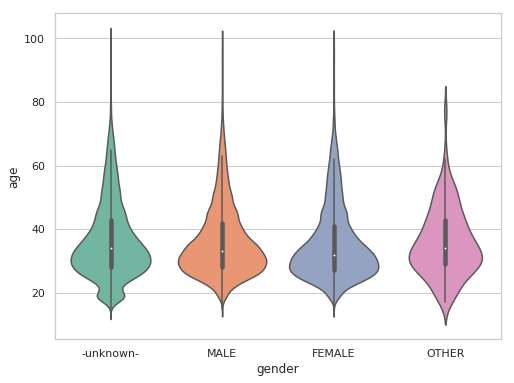

In [25]:
sns.violinplot(x='gender', y='age', palette='Set2', data=all_users);

Among the users who signed up, males and females' age distributions look similar. Males' violin is located a little higher than females.

##### Age and Country Destination

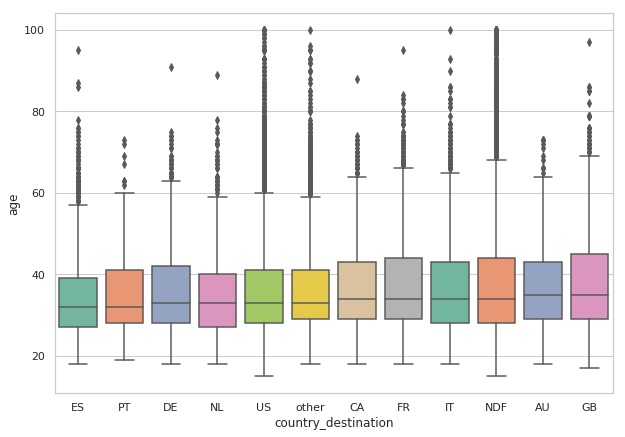

In [26]:
age_order = all_users.groupby(['country_destination'])['age'].median().reset_index().sort_values('age', ascending=True)

sns.set(style='whitegrid', rc={'figure.figsize':(10,7), 'axes.labelsize':12})
sns.boxplot(x='country_destination', y='age', palette='Set2', data=all_users, order=age_order['country_destination'], linewidth=1.5);

In [27]:
age_order

,country_destination,age
3,ES,32.0
9,PT,32.0
2,DE,33.0
8,NL,33.0
10,US,33.0
11,other,33.0
1,CA,34.0
4,FR,34.0
6,IT,34.0
7,NDF,34.0


Overall there are not a lot of differences between travelers' ages of destination countries. Those who went to Spain were a little younger while those who went to UK were older in comparison. 

*Gender and Country Destination*

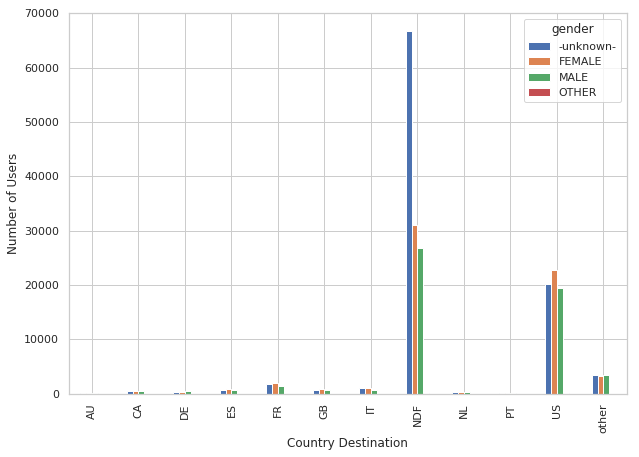

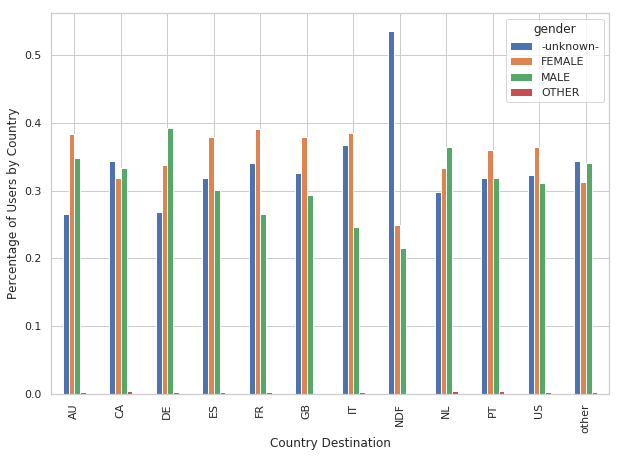

In [28]:
users_by_ctry_sex = all_users.groupby(['country_destination', 'gender']).size().reset_index(name='n_users')
users_by_ctry_sex_pvt = users_by_ctry_sex.pivot(index='country_destination', columns='gender', values='n_users')
users_by_ctry_sex_pvt_pct = users_by_ctry_sex_pvt.div(users_by_ctry_sex_pvt.sum(1), axis=0)

ax1 = users_by_ctry_sex_pvt.plot(kind='bar')
ax1.set_xlabel('Country Destination')
ax1.set_ylabel('Number of Users')

ax2 = users_by_ctry_sex_pvt_pct.plot(kind='bar')
ax2.set_ylabel('Percentage of Users by Country')
ax2.set_xlabel('Country Destination');

If we see absolute values, NDF and US had the most users. So it is easier to see the percentage and let us ignore unknown category. For some countries, like AU/ES/FR/GB/IT/PT/US, females preferred to go than males; while some countries, like CA/DE/NL and other, males preferred to go than females.

*Age, Gender and Country Destination*

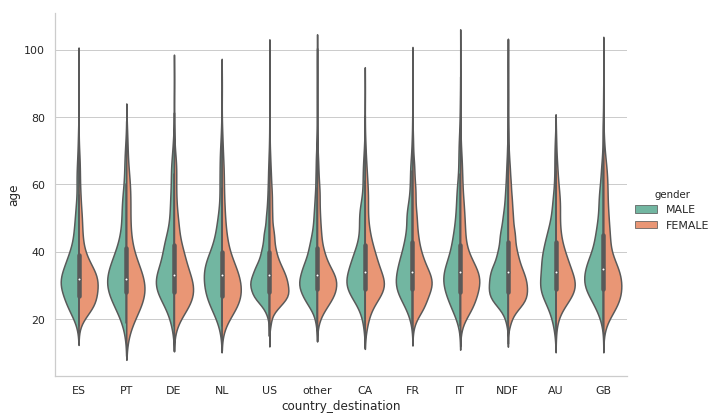

In [29]:
sns.catplot(x="country_destination", y="age", hue="gender", palette='Set2', kind="violin", split=True, 
            data=all_users.loc[all_users['gender'].isin(['FEMALE', 'MALE'])], 
            order=age_order['country_destination'], height=6, aspect=1.5);

Further split the violin plot by country, it can be clearly seen that how the age distributions of males and females varies between countries. Males' ages usually were around 30 and sometimes spreaded to 55 (Canada/France/Australia); the modes of females' ages were usually below 30, but their distributions sometimes had longer tail than males' on the 55+ side (UK/Portugal/Australia/Canada).

##### 2.2.2 Signup Fields

*Signup Method and Country Destination*

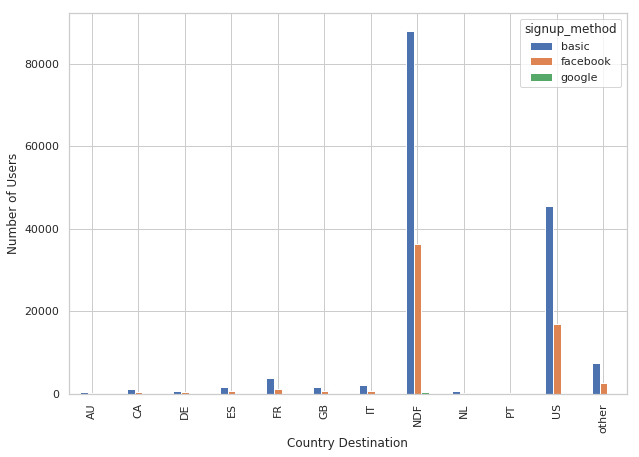

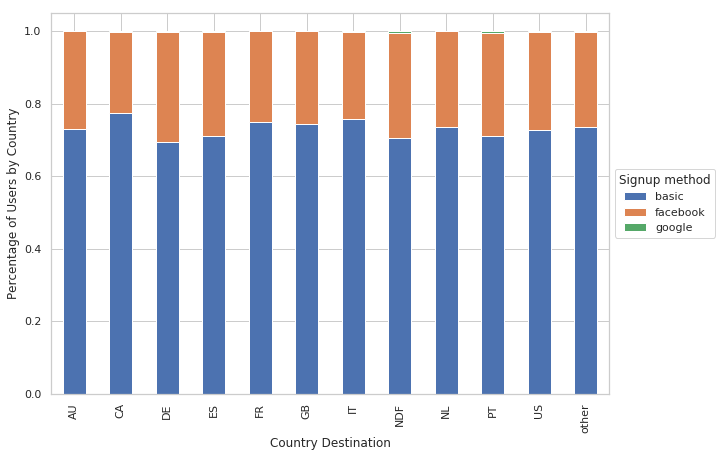

In [30]:
users_by_ctry_signup = all_users.groupby(['country_destination', 'signup_method']).size().reset_index(name='n_users')
users_by_ctry_signup_pvt = users_by_ctry_signup.pivot(index='country_destination', columns='signup_method', values='n_users')
users_by_ctry_signup_pvt_pct = users_by_ctry_signup_pvt.div(users_by_ctry_signup_pvt.sum(1), axis=0)

ax1 = users_by_ctry_signup_pvt.plot(kind='bar')
ax1.set_xlabel('Country Destination')
ax1.set_ylabel('Number of Users')

ax2 = users_by_ctry_signup_pvt_pct.plot(kind='bar', stacked=True)
ax2.set_ylabel('Percentage of Users by Country')
ax2.set_xlabel('Country Destination');
ax2.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='Signup method');

It is clear to see that basic signup was more popular than Facebook and Google. But the percentage varies between different countries. Canada, France, and Italy had a relatively higher percentage of users signing up in the basic method. Germany, Spain, and Portugal had a relatively higher percentage of users signing up through Facebook.

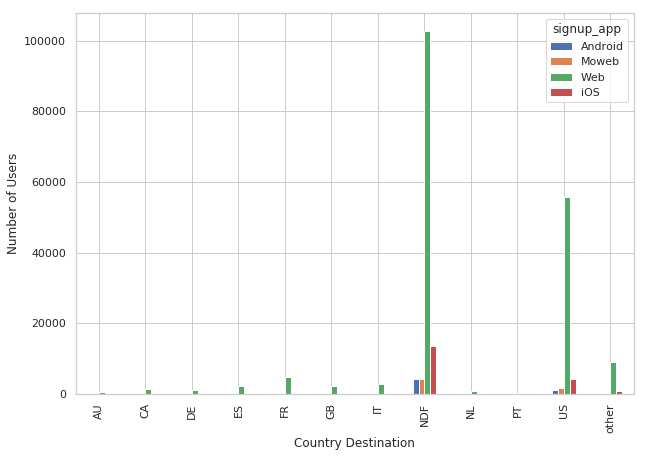

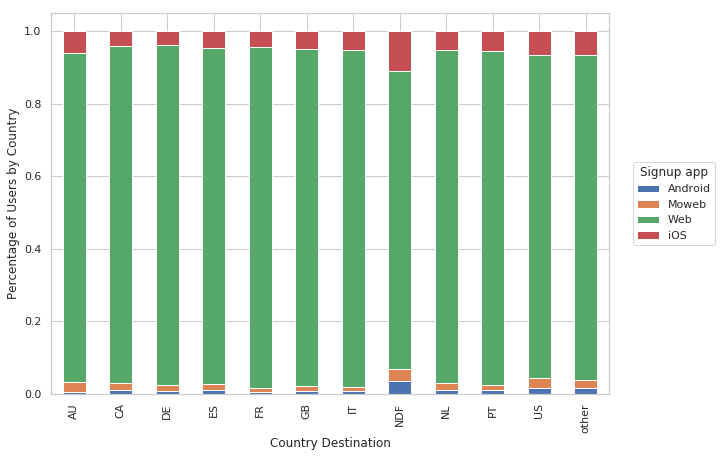

In [31]:
users_by_ctry_spapp = all_users.groupby(['country_destination', 'signup_app']).size().reset_index(name='n_users')
users_by_ctry_spapp_pvt = users_by_ctry_spapp.pivot(index='country_destination', columns='signup_app', values='n_users')
users_by_ctry_spapp_pvt_pct = users_by_ctry_spapp_pvt.div(users_by_ctry_spapp_pvt.sum(1), axis=0)

ax1 = users_by_ctry_spapp_pvt.plot(kind='bar')
ax1.set_xlabel('Country Destination')
ax1.set_ylabel('Number of Users')

ax2 = users_by_ctry_spapp_pvt_pct.plot(kind='bar', stacked=True)
ax2.set_ylabel('Percentage of Users by Country')
ax2.set_xlabel('Country Destination')
ax2.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='Signup app');

We can notice the predominant green bars (Web) across all countries. But other than that, we still can see some red (iOS) and orange (Moweb) colors appearing especially in US, AU, and other.

*Signup Flow and Country Destination*

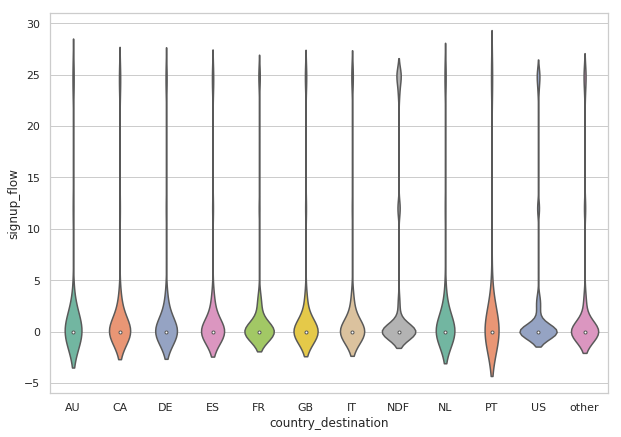

In [32]:
signup_flow_order = all_users.groupby(['country_destination'])['signup_flow'].median().reset_index().sort_values('signup_flow', ascending=False)
sns.violinplot(x='country_destination', y='signup_flow', palette='Set2', data=all_users, order=signup_flow_order['country_destination'], linewidth=1.5);

Overall, it looks like there are not a lot of differences between each country's signup flow. But by looking at the shape of each violin, we can still find something. PT/AU/NL have a relatively more "slender" shape, which means that their signup flow values varied a lot. US/NDF/GB have a relatively "fatter" shape, which means that their signup flow value were more concentated. Besides, at the top of each violin (around 25), especially for NDF/US/other, they have some values around there. My guess is that those who is hard to decide on signing up or not usually may end up booking nothing.

*First Device Type and Country Destination*

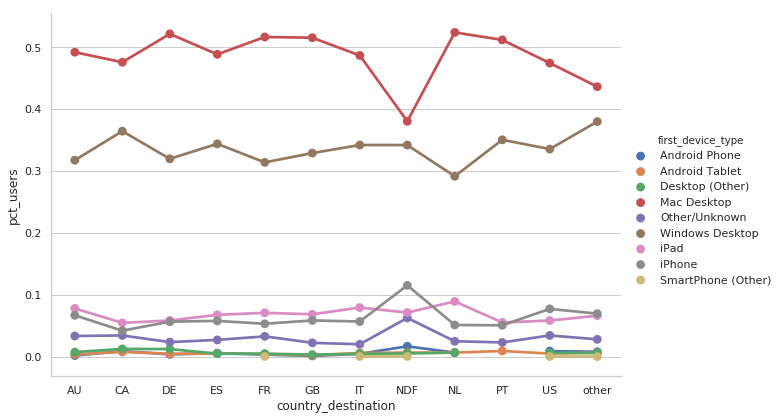

In [33]:
# number of users by country
users_by_ctry = all_users.groupby(['country_destination']).size().reset_index(name='tot_users')
# number of users by country and first device type
users_by_ctry_device = all_users.groupby(['country_destination', 'first_device_type']).size().reset_index(name='n_users')
users_by_ctry_device = users_by_ctry_device.merge(users_by_ctry, left_on='country_destination', right_on='country_destination')
users_by_ctry_device['pct_users'] = users_by_ctry_device['n_users'] / users_by_ctry_device['tot_users']

sns.catplot(x='country_destination', y='pct_users', hue='first_device_type', kind='point', data=users_by_ctry_device, height=6, aspect=1.5);

As we have discussed, computers (Max/Windows/Other Desktop) were usually the first device, especially Mac. But the percentage varied a little between different country destinations. Among people who have been to Netherlands, over 50% used Mac as their first device to sign in and the percentage of using iPad was also the highest compared to other destinations. On the other side, over 35% people who have been to Canada used Windows Desktop and the percentage of this group of people using Mac as well as iPad/iPhone was relatively lower than other countries. For those who did not book any places, the percentage of using Mac was quite low while the percentage of using iPhone was the highest. 

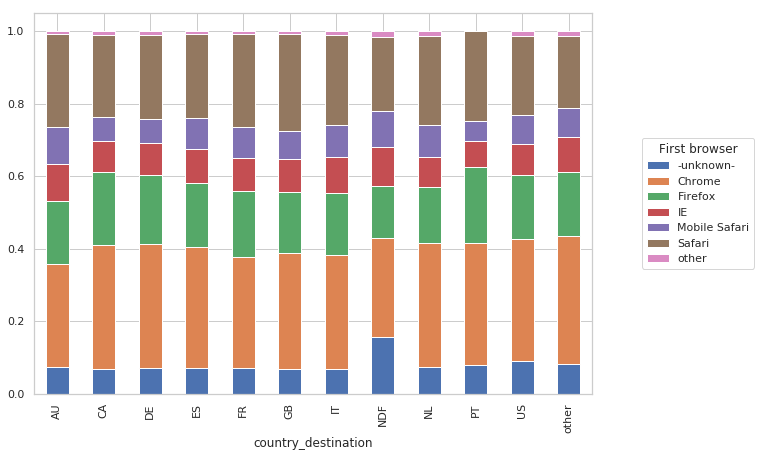

In [34]:
users_by_ctry_browser = all_users.groupby(['country_destination', 'first_browser']).size().reset_index(name='n_users')
users_by_ctry_browser = users_by_ctry_browser.merge(users_by_ctry, left_on='country_destination', right_on='country_destination')
users_by_ctry_browser['pct_users'] = users_by_ctry_browser['n_users'] / users_by_ctry_browser['tot_users']
users_by_ctry_browser.loc[users_by_ctry_browser.pct_users < 0.01, 'first_browser'] = 'other'
users_by_ctry_browser_agg = users_by_ctry_browser.groupby(['country_destination', 'first_browser'])['pct_users'].sum().reset_index(name='pct_users')
users_by_ctry_browser_pvt = users_by_ctry_browser_agg.pivot(index='country_destination', columns='first_browser', values='pct_users')

ax = users_by_ctry_browser_pvt.plot(kind='bar', stacked=True)
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='First browser');

Chrome, Safari, and Firefox were the most frequently used browser. Sometimes Chrome were used quited a lot, like in Netherlands, Germany, Canada, US, Portugal. Sometimes it was Safari, like France, UK, Italy, Netherlands. Sometimes it was Firefox, like Portugal, Canada, Australia.

##### 2.2.3 Affiliate Fields

*Affiliate Channel and Country Destination*

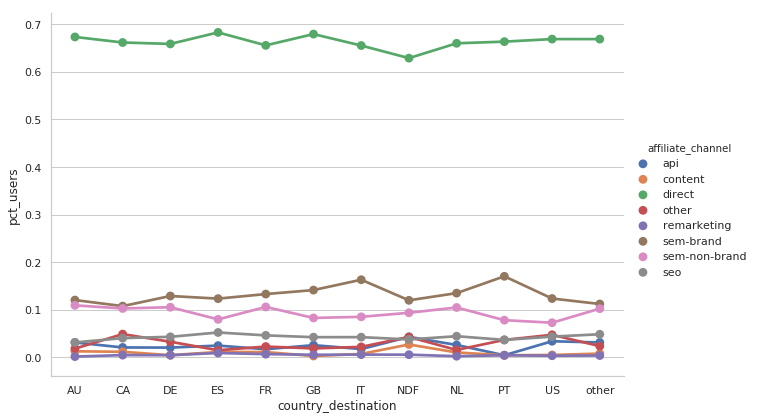

In [35]:
users_by_ctry_affchnl = all_users.groupby(['country_destination', 'affiliate_channel']).size().reset_index(name='n_users')
users_by_ctry_affchnl = users_by_ctry_affchnl.merge(users_by_ctry, left_on='country_destination', right_on='country_destination')
users_by_ctry_affchnl['pct_users'] = users_by_ctry_affchnl['n_users'] / users_by_ctry_affchnl['tot_users']

sns.catplot(x='country_destination', y='pct_users', hue='affiliate_channel', kind='point', data=users_by_ctry_affchnl, height=6, aspect=1.5);

Direct marketing seemed to be effective in every country destination, especially in Spain and UK. SEM-brand was also useful, espcially in Portugal and Italy. SEM-non-brand was not as effective as SEM-brand but in some country destinations, they performed very similar, like in Canada and Australia.

*Affiliate Provider and Country Destination*

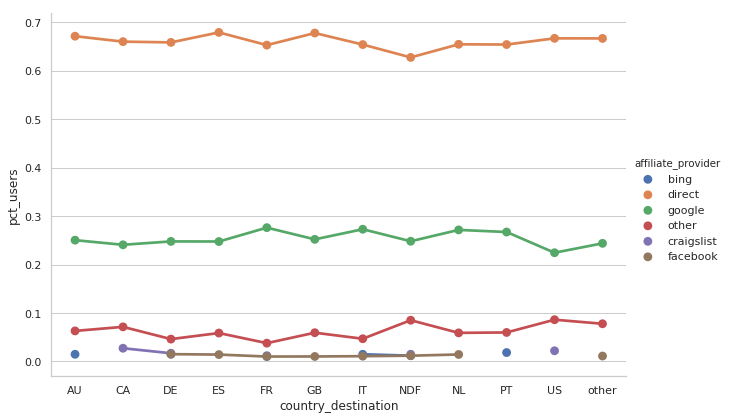

In [36]:
users_by_ctry_affprvdr = all_users.groupby(['country_destination', 'affiliate_provider']).size().reset_index(name='n_users')
users_by_ctry_affprvdr = users_by_ctry_affprvdr.merge(users_by_ctry, left_on='country_destination', right_on='country_destination')
users_by_ctry_affprvdr['pct_users'] = users_by_ctry_affprvdr['n_users'] / users_by_ctry_affprvdr['tot_users']
users_by_ctry_affprvdr.loc[users_by_ctry_affprvdr.pct_users < 0.01, 'affiliate_provider'] = 'other'
users_by_ctry_affprvdr_agg = users_by_ctry_affprvdr.groupby(['country_destination', 'affiliate_provider'])['pct_users'].sum().reset_index(name='pct_users')

sns.catplot(x='country_destination', y='pct_users', hue='affiliate_provider', kind='point', data=users_by_ctry_affprvdr_agg, height=6, aspect=1.5);

Still, direct marketing sits on the top and the trend is similar to what we have in the plot of affiliate channel. Google was also very helpful. It gained over 20% of users who went to US, which was relatively low but for destinations like France and Italy it was good.

*First Affiliate Tracked and Country Destination*

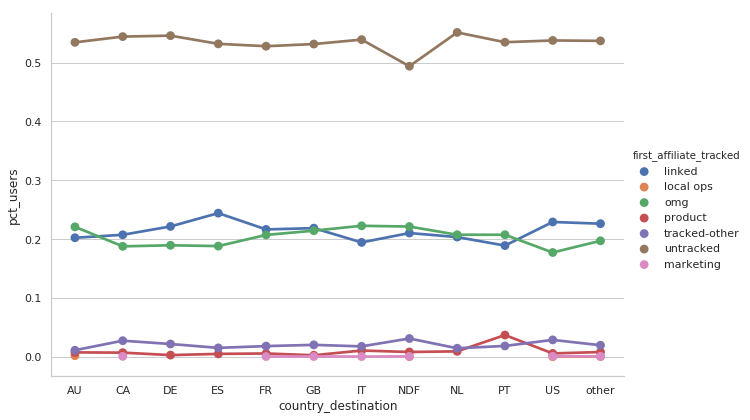

In [37]:
users_by_ctry_afftrack = all_users.groupby(['country_destination', 'first_affiliate_tracked']).size().reset_index(name='n_users')
users_by_ctry_afftrack = users_by_ctry_afftrack.merge(users_by_ctry, left_on='country_destination', right_on='country_destination')
users_by_ctry_afftrack['pct_users'] = users_by_ctry_afftrack['n_users'] / users_by_ctry_afftrack['tot_users']
sns.catplot(x='country_destination', y='pct_users', hue='first_affiliate_tracked', kind='point', data=users_by_ctry_afftrack, height=6, aspect=1.5);

Untracked were most commonly seen among users. Then the percentage users earned by linked and omg varied between country destinations. Linked performed better in Spain, US, Geramny while omg performed better in Italy. 

##### 2.2.4 Date Fields

*Date Account Created*

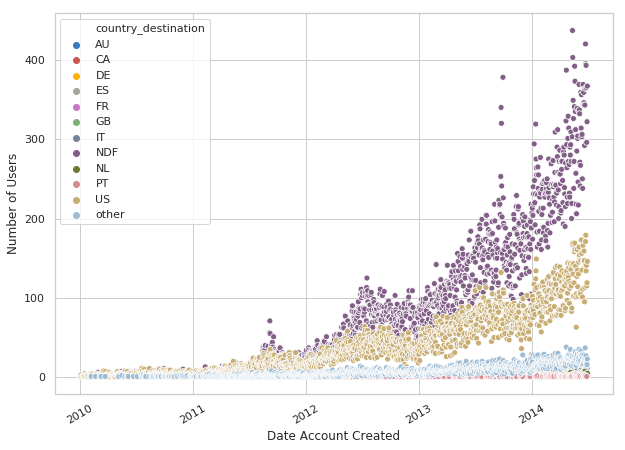

In [38]:
users_by_ctry_dateacc = all_users.groupby(['country_destination', 'date_account_created']).size().reset_index(name='n_users')
users_by_ctry_dateacc['date_account_created_plt'] = mdates.date2num(users_by_ctry_dateacc['date_account_created'])

colors = ['windows blue', 'dark salmon', 'amber', 'greyish', 'orchid', 'faded green', 'steel', 'dusty purple',  'olive drab', 'dusty pink', 'sandstone', 'light grey blue']
custompalette = sns.set_palette(sns.xkcd_palette(colors))
sns.scatterplot(x='date_account_created_plt', y='n_users', data=users_by_ctry_dateacc, hue='country_destination', palette=custompalette)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=30)
plt.xlabel('Date Account Created')
plt.ylabel('Number of Users');

Overall the number of users who created accounts was increasing. Most increase came from NDF users but still users who have made reservations in different destinations also grew, more or less, especially US.

*Date First Active*

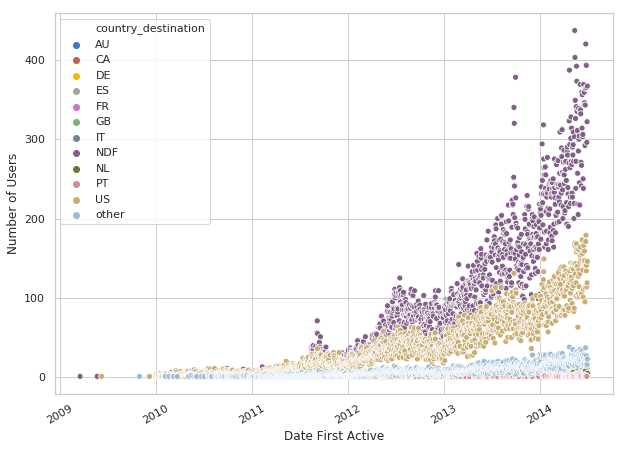

In [39]:
users_by_ctry_timeact = all_users.groupby(['country_destination', 'date_first_active']).size().reset_index(name='n_users')
users_by_ctry_timeact['date_first_active_plt'] = mdates.date2num(users_by_ctry_timeact['date_first_active'])

sns.scatterplot(x='date_first_active_plt', y='n_users', data=users_by_ctry_timeact, hue='country_destination', palette=custompalette)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=30)
plt.xlabel('Date First Active')
plt.ylabel('Number of Users');

Same trend as before but this plot is much cleaner. So overall the number of avtive users was increasing from 2009 to 2014, especially of those who booked in US.

*Days between Signup and First Booking*

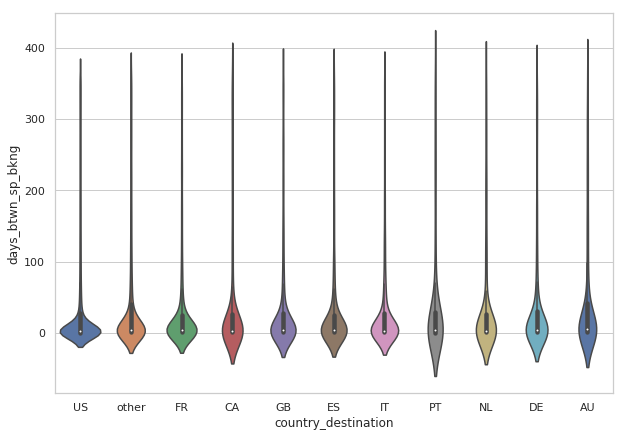

In [40]:
all_users.days_btwn_sp_bkng.loc[all_users['days_btwn_sp_bkng'] < 0] = np.nan
sns.violinplot(x='country_destination', y='days_btwn_sp_bkng', data=all_users.loc[all_users['country_destination'] != 'NDF'], palette='deep');

*Month/Weekday/Day of Account Created*

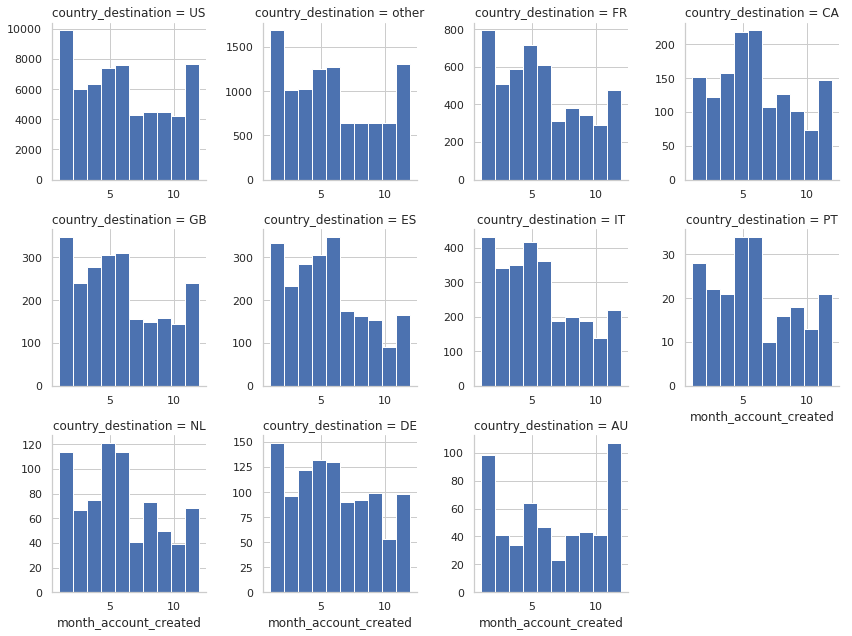

In [41]:
g = sns.FacetGrid(all_users.loc[all_users['country_destination'] != 'NDF'], col='country_destination', col_wrap=4, sharex=False, sharey=False)
g = (g.map(plt.hist, 'month_account_created', color='#4c72b0'));

Month of creating account varied among different destinations. Those who traveled to countries like US/AU usually created their accounts during the end or beginning of the year, that is, December and January. Those who traveled to countries like CA/PT/NL usually created acounts during the middle of the year.

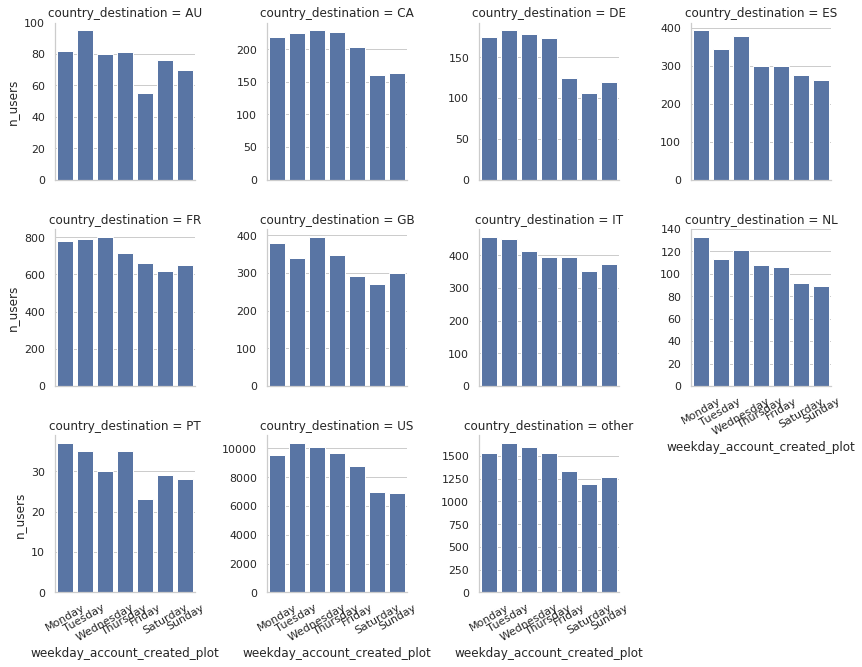

In [42]:
users_by_ctry_wkdybook = all_users.groupby(['country_destination', 'weekday_account_created_plot']).size().reset_index(name='n_users')

g = sns.FacetGrid(users_by_ctry_wkdybook.loc[users_by_ctry_wkdybook['country_destination'] != 'NDF'], 
                  col='country_destination', col_wrap=4, sharey=False)
g = (g.map(sns.barplot, 'weekday_account_created_plot', 'n_users', 
           order=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
           color='#4c72b0'))
g.set_xticklabels(rotation=30);

In general, users created accounts usually at the beginning of a week, especially Monday and Tuesday.

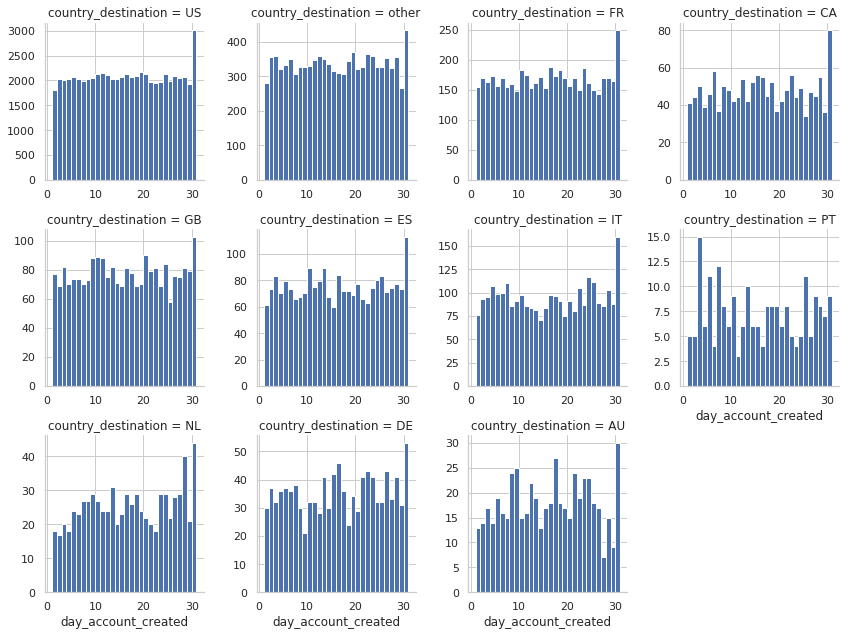

In [43]:
g = sns.FacetGrid(all_users.loc[all_users['country_destination'] != 'NDF'], col='country_destination', col_wrap=4, sharex=False, sharey=False)
g = (g.map(plt.hist, 'day_account_created', bins=30, color='#4c72b0'));

Noticeably, users would prefer to make bookings on the last day of each month, except for those who went to Portugal. Those who went to Portugal seemed to arrange their traveling during early days of each month.

*Month/Weekday/Day of First Booking*

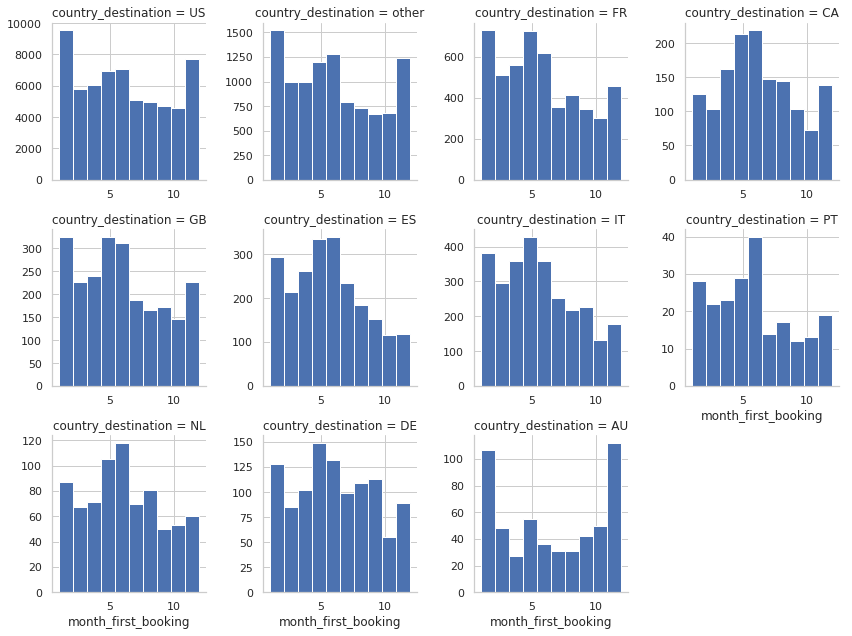

In [44]:
g = sns.FacetGrid(all_users.loc[all_users['country_destination'] != 'NDF'], col='country_destination', col_wrap=4, sharex=False, sharey=False)
g = (g.map(plt.hist, 'month_first_booking', color='#4c72b0'));

Overall the pattern looks similar to month of account created.

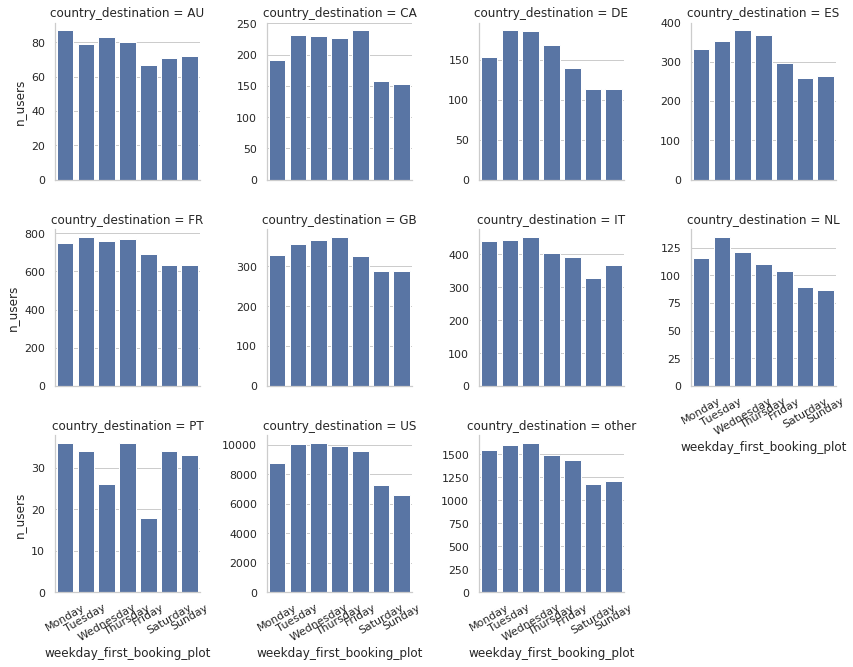

In [45]:
users_by_ctry_wkdybook = all_users.groupby(['country_destination', 'weekday_first_booking_plot']).size().reset_index(name='n_users')

g = sns.FacetGrid(users_by_ctry_wkdybook.loc[users_by_ctry_wkdybook['country_destination'] != 'NDF'], 
                  col='country_destination', col_wrap=4, sharey=False)
g = (g.map(sns.barplot, 'weekday_first_booking_plot', 'n_users', 
           order=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           color='#4c72b0'))
g.set_xticklabels(rotation=30);

Similar pattern as weekday of account created. But now Monday is not so popular as before, instead, Wednesday got many reservations. 

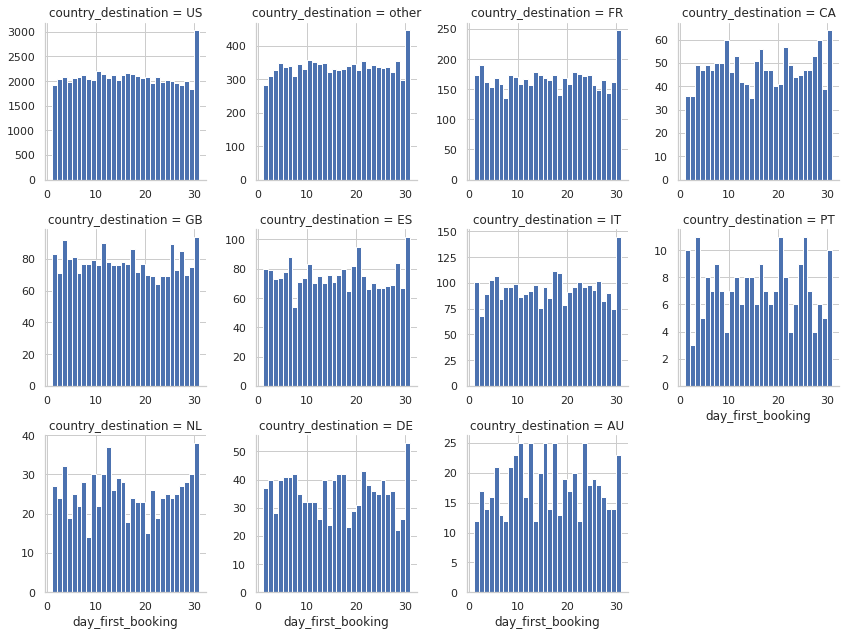

In [46]:
g = sns.FacetGrid(all_users.loc[all_users['country_destination'] != 'NDF'], col='country_destination', col_wrap=4, sharex=False, sharey=False)
g = (g.map(plt.hist, 'day_first_booking', bins=30, color='#4c72b0'));

We can still observe the spike at the end of the month, but now the pattern seems not so clear as before. We have more fluctuations in countries like NL/AU.

Based on the exploratory analyses so far, I think that ---
1. For demographics, we could use the findings to target particular groups of people when we track their intentions of traveling to each country;
1. For signup fields, we could focus more on the popular methods people used to sign up and try to improve the methods, for example, improve the website design as majority of users signed up through websites, etc.;
1. For affiliate fields, we now know that direct marketing is the most effective way to attract new users so we could invest more in this marketing channel;
1. For date fields, we could use the findings to optimize marketing efforts and reduce the cost, for example, decrease marketing activities on Thursday or during the months like September/October since there were fewer users booking during these times, etc.